In [1]:
using Gadfly
using DataFrames
using DataFramesMeta

In [2]:
sources = Dict(
    "OribitrapVelos" => "data/OrbitrapVelos_msms.txt",
    "QExactive" => "data/QExactive_msms.txt",
    "TTOF6600" => "data/TTOF6600_msms.txt"
)

Dict{String,String} with 3 entries:
  "QExactive"      => "data/QExactive_msms.txt"
  "TTOF6600"       => "data/TTOF6600_msms.txt"
  "OribitrapVelos" => "data/OrbitrapVelos_msms.txt"

### loading and concatenating data

In [3]:
tic()
data = DataFrame()
for (name, filename) in sources
    tmp_data = readtable(filename, separator='\t')
    tmp_data = @transform(tmp_data, source = name)
    data = vcat(data, tmp_data)
end
toc()

elapsed time: 79.573726664 seconds


79.573726664

In [4]:
head(data)

,Raw_file,Scan_number,Scan_index,Sequence,Length,Missed_cleavages,Modifications,Modified_sequence,Oxidation_M_Probabilities,Oxidation_M_Score_Diffs,Acetyl_Protein_N_term_,Oxidation_M_,Proteins,Gene_Names,Protein_Names,Charge,Fragmentation,Mass_analyzer,Type,Scan_event_number,Isotope_index,m_z,Mass,Mass_Error_ppm_,Simple_Mass_Error_ppm_,Retention_time,PEP,Score,Delta_score,Score_diff,Localization_prob,Combinatorics,PIF,Fraction_of_total_spectrum,Base_peak_fraction,Precursor_Full_ScanNumber,Precursor_Intensity,Precursor_Apex_Fraction,Precursor_Apex_Offset,Precursor_Apex_Offset_Time,Matches,Intensities,Mass_Deviations_Da_,Mass_Deviations_ppm_,Masses,Number_of_Matches,Intensity_coverage,Peak_coverage,Neutral_loss_level,ETD_identification_type,Reverse,All_scores,All_sequences,All_modified_sequences,id,Protein_group_IDs,Peptide_ID,Mod_peptide_ID,Evidence_ID,Oxidation_M_site_IDs,source,Precursor,Scan_type
1,20160301_OEx_GMoeller_MacroD2ko_study_GM1ko_rep1,32685,23242,AAAAAAAAAAAAAAAGAGAGAK,22,0,Unmodified,_AAAAAAAAAAAAAAAGAGAGAK_,NA,NA,0,0,P55011,SLC12A2,Solute carrier family 12 member 2,3,HCD,FTMS,MULTI-MSMS,7,0,532.95327,1595.838,-0.23944,-0.87506064,62.452,0.00058811,55.031,46.907,NaN,NaN,1,0.0,0.0,0.0,-1,0.0,0.0,0,0.0,y1;y2;y5;y6;y7;y8;y9;y10;y11;y12;y13;y14;y1-NH3;y2-NH3;y9(2+);a2;b2;b3;b4;b5;b7;b8;b9;b10;b11;b12;b6(2+);b8(2+);b10(2+);b11(2+);b14(2+),895199.3;59770.2;335766.1;194599.7;1104094;1185833;790066.2;756953.8;498828.2;226090;89140;44333.8;559952.2;317541.5;237456.8;598585.8;883414.6;951703.5;980556.8;1149994;937182.8;1051685;1099357;619176.8;238105.5;1234942;951703.5;980556.8;1149994;244836.6;937182.8,-0.0001375291;-0.0004200734;-0.0008365561;0.00107463;-0.0003056177;-0.00261137;-0.003426225;-0.001974004;0.002773234;-0.001732022;0.005487244;-0.01057747;-0.0004399211;0.000725306;-0.002947377;-0.0004713;-0.0001857526;-1.831919E-05;0.0006768748;0.0006957669;-0.0001778641;0.0005781098;-0.0020717;0.006049676;-0.01111108;-0.001812826;-1.831919E-05;0.0006768748;0.0006957669;-0.002771133;-0.0001778641,-0.9348538;-1.925614;-2.074634;2.26588;-0.5752382;-4.33546;-5.088204;-2.651798;3.400929;-1.953829;5.730769;-10.28378;-3.381753;3.606287;-8.741051;-4.09516;-1.298227;-0.08555625;2.373708;1.953347;-0.3569653;1.015468;-3.235295;8.504233;-14.2008;-2.124104;-0.08555625;2.373708;1.953347;-7.074375;-0.3569653,147.112941699685;218.150338031774;403.23079574954;474.265998351422;531.288842322457;602.328261862967;673.36619050542;744.40185207188;815.434218622276;886.475837665737;957.505732187932;1028.55891068866;130.086694990201;201.122643550875;337.18796775076;115.087060720121;143.081689794759;214.118636149186;285.155054743037;356.192149638736;498.267250845303;569.303608659233;640.343372256457;711.372364668393;782.426639213509;853.454454746074;214.118636149186;285.155054743037;356.192149638736;391.714173432536;498.267250845303,31,0.2240562,0.1255814,None,Unknown,NA,55.03109;8.124496;5.714879,AAAAAAAAAAAAAAAGAGAGAK;LHSISSIDVNGGNRK;VNPENKAALEAWVR,_AAAAAAAAAAAAAAAGAGAGAK_;_LHSISSIDVNGGNRK_;_VNPENKAALEAWVR_,0,1515,0,0,0,NA,QExactive,NA,NA
2,20160301_OEx_GMoeller_MacroD2ko_study_GM1ko_rep2,28921,19036,AAAAAAAAAAAAAAAGAGAGAK,22,0,Unmodified,_AAAAAAAAAAAAAAAGAGAGAK_,NA,NA,0,0,P55011,SLC12A2,Solute carrier family 12 member 2,3,HCD,FTMS,MULTI-SECPEP,5,1,532.95327,1595.838,-0.78767,698.63205,60.953,3.8875e-7,73.918,67.712,NaN,NaN,1,0.0,0.0,0.0,-1,0.0,0.0,0,0.0,y1;y2;y3;y5;y6;y7;y8;y9;y10;y11;y12;y13;y1-NH3;y2-NH3;y7(2+);a2;b2;b3;b4;b5;b6;b7;b8;b9;b11;b6(2+);b8(2+);b10(2+);b12(2+);b14(2+),417382;158715.1;265538.4;335767.2;155092.8;1076053;659807.9;613183.1;458829.9;162654.6;109235.9;72884.4;226983.8;244205;285422.3;841657.6;1071431;1018319;933456.2;964669.7;938700.3;863646.2;860214.4;673990;183340.2;1018319;933456.2;964669.7;938700.3;863646.2,-0.000212004;-0.0004573324;-0.00088818;-0.002430423;-0.002109958;-0.0002454752;-0.002487721;-0.0009979928;-0.003039022;0.002302693;0.008963547;0.01271631;-0.0007465026;-0.0005712909;-0.001046374;-0.0004906342;-0.00

### computing seq count

In [5]:
@time begin
seq_count = @by(data, [:source, :Sequence], psm_count = length(:Sequence));
data = join(data, seq_count, on = [:source, :Sequence]);
end

 16.464673 seconds (21.59 M allocations: 1.093 GB, 61.47% gc time)


,Raw_file,Scan_number,Scan_index,Sequence,Length,Missed_cleavages,Modifications,Modified_sequence,Oxidation_M_Probabilities,Oxidation_M_Score_Diffs,Acetyl_Protein_N_term_,Oxidation_M_,Proteins,Gene_Names,Protein_Names,Charge,Fragmentation,Mass_analyzer,Type,Scan_event_number,Isotope_index,m_z,Mass,Mass_Error_ppm_,Simple_Mass_Error_ppm_,Retention_time,PEP,Score,Delta_score,Score_diff,Localization_prob,Combinatorics,PIF,Fraction_of_total_spectrum,Base_peak_fraction,Precursor_Full_ScanNumber,Precursor_Intensity,Precursor_Apex_Fraction,Precursor_Apex_Offset,Precursor_Apex_Offset_Time,Matches,Intensities,Mass_Deviations_Da_,Mass_Deviations_ppm_,Masses,Number_of_Matches,Intensity_coverage,Peak_coverage,Neutral_loss_level,ETD_identification_type,Reverse,All_scores,All_sequences,All_modified_sequences,id,Protein_group_IDs,Peptide_ID,Mod_peptide_ID,Evidence_ID,Oxidation_M_site_IDs,source,Precursor,Scan_type,psm_count
1,20160301_OEx_GMoeller_MacroD2ko_study_GM1ko_rep1,32685,23242,AAAAAAAAAAAAAAAGAGAGAK,22,0,Unmodified,_AAAAAAAAAAAAAAAGAGAGAK_,NA,NA,0,0,P55011,SLC12A2,Solute carrier family 12 member 2,3,HCD,FTMS,MULTI-MSMS,7,0,532.95327,1595.838,-0.23944,-0.87506064,62.452,0.00058811,55.031,46.907,NaN,NaN,1,0.0,0.0,0.0,-1,0.0,0.0,0,0.0,y1;y2;y5;y6;y7;y8;y9;y10;y11;y12;y13;y14;y1-NH3;y2-NH3;y9(2+);a2;b2;b3;b4;b5;b7;b8;b9;b10;b11;b12;b6(2+);b8(2+);b10(2+);b11(2+);b14(2+),895199.3;59770.2;335766.1;194599.7;1104094;1185833;790066.2;756953.8;498828.2;226090;89140;44333.8;559952.2;317541.5;237456.8;598585.8;883414.6;951703.5;980556.8;1149994;937182.8;1051685;1099357;619176.8;238105.5;1234942;951703.5;980556.8;1149994;244836.6;937182.8,-0.0001375291;-0.0004200734;-0.0008365561;0.00107463;-0.0003056177;-0.00261137;-0.003426225;-0.001974004;0.002773234;-0.001732022;0.005487244;-0.01057747;-0.0004399211;0.000725306;-0.002947377;-0.0004713;-0.0001857526;-1.831919E-05;0.0006768748;0.0006957669;-0.0001778641;0.0005781098;-0.0020717;0.006049676;-0.01111108;-0.001812826;-1.831919E-05;0.0006768748;0.0006957669;-0.002771133;-0.0001778641,-0.9348538;-1.925614;-2.074634;2.26588;-0.5752382;-4.33546;-5.088204;-2.651798;3.400929;-1.953829;5.730769;-10.28378;-3.381753;3.606287;-8.741051;-4.09516;-1.298227;-0.08555625;2.373708;1.953347;-0.3569653;1.015468;-3.235295;8.504233;-14.2008;-2.124104;-0.08555625;2.373708;1.953347;-7.074375;-0.3569653,147.112941699685;218.150338031774;403.23079574954;474.265998351422;531.288842322457;602.328261862967;673.36619050542;744.40185207188;815.434218622276;886.475837665737;957.505732187932;1028.55891068866;130.086694990201;201.122643550875;337.18796775076;115.087060720121;143.081689794759;214.118636149186;285.155054743037;356.192149638736;498.267250845303;569.303608659233;640.343372256457;711.372364668393;782.426639213509;853.454454746074;214.118636149186;285.155054743037;356.192149638736;391.714173432536;498.267250845303,31,0.2240562,0.1255814,None,Unknown,NA,55.03109;8.124496;5.714879,AAAAAAAAAAAAAAAGAGAGAK;LHSISSIDVNGGNRK;VNPENKAALEAWVR,_AAAAAAAAAAAAAAAGAGAGAK_;_LHSISSIDVNGGNRK_;_VNPENKAALEAWVR_,0,1515,0,0,0,NA,QExactive,NA,NA,5
2,20160301_OEx_GMoeller_MacroD2ko_study_GM1ko_rep2,28921,19036,AAAAAAAAAAAAAAAGAGAGAK,22,0,Unmodified,_AAAAAAAAAAAAAAAGAGAGAK_,NA,NA,0,0,P55011,SLC12A2,Solute carrier family 12 member 2,3,HCD,FTMS,MULTI-SECPEP,5,1,532.95327,1595.838,-0.78767,698.63205,60.953,3.8875e-7,73.918,67.712,NaN,NaN,1,0.0,0.0,0.0,-1,0.0,0.0,0,0.0,y1;y2;y3;y5;y6;y7;y8;y9;y10;y11;y12;y13;y1-NH3;y2-NH3;y7(2+);a2;b2;b3;b4;b5;b6;b7;b8;b9;b11;b6(2+);b8(2+);b10(2+);b12(2+);b14(2+),417382;158715.1;265538.4;335767.2;155092.8;1076053;659807.9;613183.1;458829.9;162654.6;109235.9;72884.4;226983.8;244205;285422.3;841657.6;1071431;1018319;933456.2;964669.7;938700.3;863646.2;860214.4;673990;183340.2;1018319;933456.2;964669.7;938700.3;863646.2,-0.000212004;-0.0004573324;-0.00088818;-0.002430423;-0.002109958;-0.0002454752;-0.002487721;-0.0009979928;-0.003039022;0.002302693;0.008963547;0.01271631;-0.0007465026;-0.0005712909;-0.001046374;-0.0004

## 1a) 

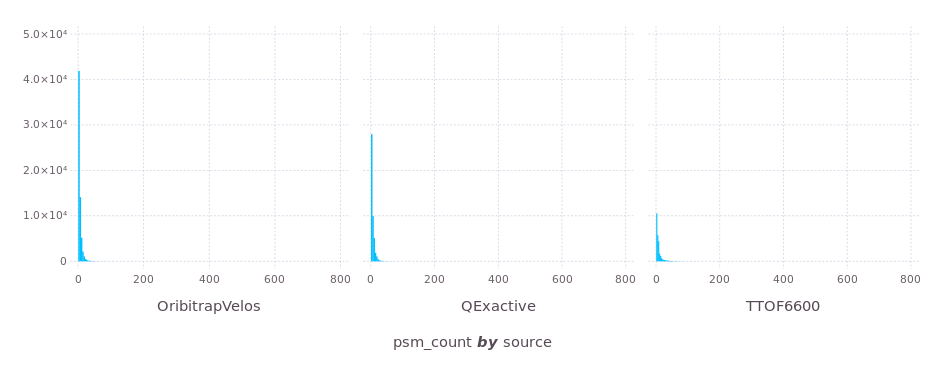

 48.329109 seconds (42.66 M allocations: 1.594 GB, 15.43% gc time)


false

In [6]:
@time begin
p = Gadfly.plot(seq_count, xgroup = :source, x = :psm_count, Geom.subplot_grid(Geom.histogram))
draw(PNG(25cm, 10cm), p)
end

## 1b) 

b1

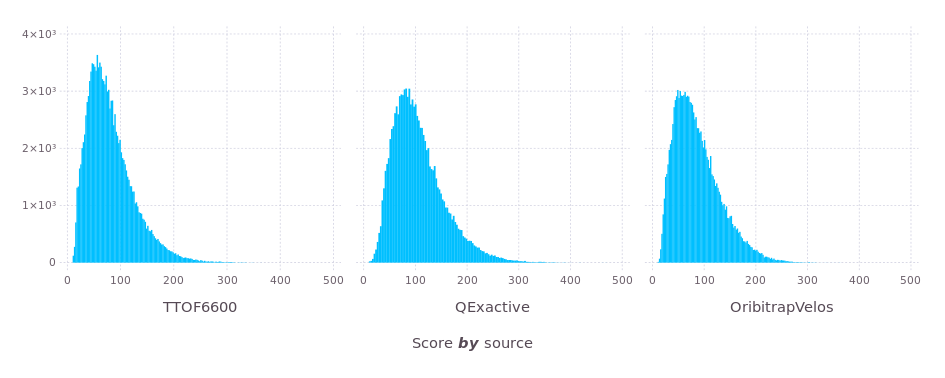

 14.991165 seconds (36.96 M allocations: 1.347 GB, 60.35% gc time)


false

In [7]:
@time begin
p = Gadfly.plot(@where(data, :psm_count .> 10), xgroup = :source, x = :Score, Geom.subplot_grid(Geom.histogram))
draw(PNG(25cm, 10cm), p)
end

b2

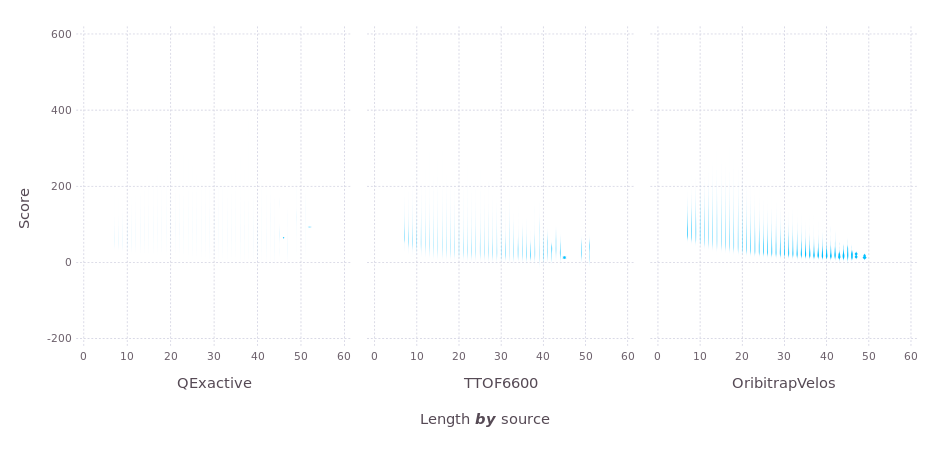

 29.457789 seconds (118.61 M allocations: 3.356 GB, 32.09% gc time)


false

In [8]:
@time begin
p = Gadfly.plot(data, y = :Score, x = :Length, xgroup = :source, Geom.subplot_grid(Geom.violin))
draw(PNG(25cm, 12cm), p)
end

b3

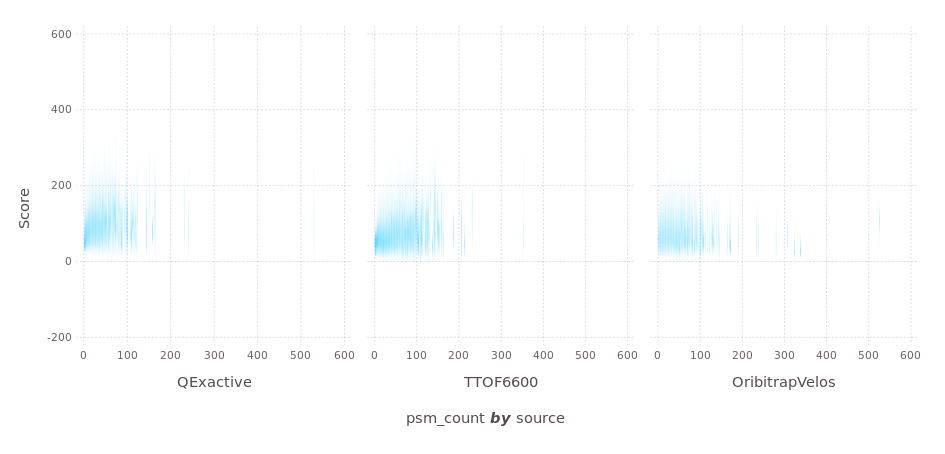

 26.123580 seconds (116.97 M allocations: 3.240 GB, 41.96% gc time)


false

In [9]:
@time begin
p = Gadfly.plot(data, y = :Score, x = :psm_count, xgroup = :source, Geom.subplot_grid(Geom.violin))
draw(PNG(25cm, 12cm), p)
end

## 1c)

In [10]:
@time begin
function sum_intensities(intensity)
    intensities = [parse(Float64, f) for f in split(strip(intensity), ";")]
    sum(intensities)
end

data[:intensity] = [sum_intensities(x) for x in data[:Intensities]];
end

  8.635121 seconds (28.10 M allocations: 1.705 GB, 29.40% gc time)


807550-element Array{Float64,1}:
     2.13046e7
     1.831e7  
     1.48967e7
     1.74295e7
     1.63057e7
     6.94718e7
     2.86103e8
     3.53485e7
     3.2093e8 
     5.96797e7
     6.86909e7
     2.00744e7
     5.04969e7
     ⋮        
 85758.5      
 15320.2      
 62280.0      
     2.22377e7
     6.31623e6
   854.0      
  2650.0      
  3124.0      
  1603.0      
     1.45071e5
     1.47552e5
 84168.0      

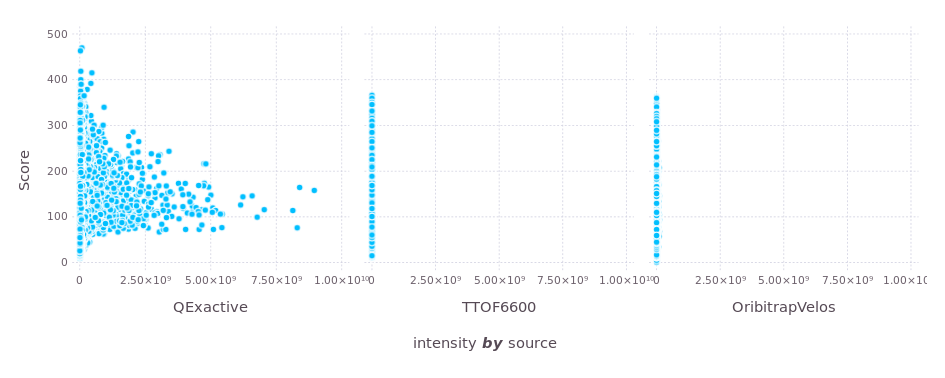

 33.862779 seconds (133.71 M allocations: 3.610 GB, 42.55% gc time)


false

In [11]:
@time begin
p = Gadfly.plot(data, xgroup = :source, x = :intensity, y = :Score, Geom.subplot_grid(Geom.point))
draw(PNG(25cm, 10cm), p)
end

## 1d)

my favorite PSM is per definition the one that occurs first in the list, as it is easiest to retrieve. 

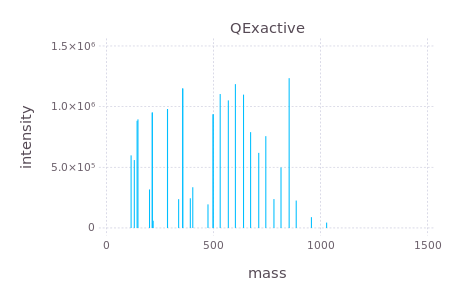

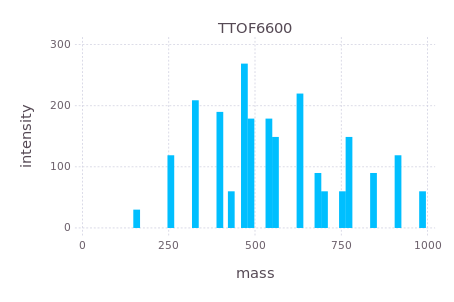

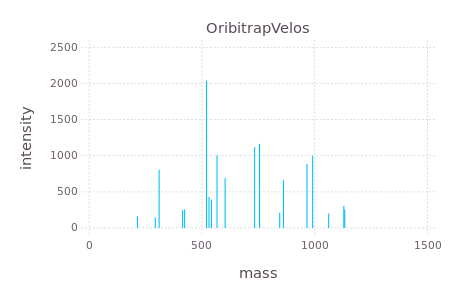

 15.352197 seconds (1.91 M allocations: 886.700 MB, 72.87% gc time)


In [12]:
@time begin 
function split_numeric(str_list)
    [parse(Float64, f) for f in split(strip(str_list), ";")]
end

plots = []
for source in keys(sources)
    tmp_dat = @where(data, :source .== source)[1,:]
    spectrum = DataFrame(intensity = split_numeric(tmp_dat[1,:Intensities]),
            mass = split_numeric(tmp_dat[1,:Masses]))
    p = Gadfly.plot(spectrum, x = :mass, y = :intensity, Geom.bar, Guide.title(source))
    push!(plots, p)
end
    
for plot in plots
   draw(PNG(12cm, 8cm), plot) 
end
    
end

## 1e
my favorite ion is the b1-ion, as it is the simplest unit (1-element fragment of the peptide, starting from the N-terminus. 

I don't understand how I should plot the distribution of intensities of that ion *against* the number of PSM's with that ion, as the PSM-count for a given ion is a single, fixed number. 

I therefore visualize the distribution of intensities as a histogram

### search for all b1-ions

In [16]:
tic()
b1_intensities = []
for (ions, intensities) in zip(data[:,:Matches], data[:,:Intensities])
    for (ion, intensity) in zip(split(strip(ions), ";"), split_numeric(intensities))
        if ion == "b2"
            push!(b1_intensities, intensity)
        end
    end
end
b1_intensities = DataFrame(intensity = b1_intensities)
toc()

elapsed time: 70.111650765 seconds


70.111650765

  0.316727 seconds (1.35 M allocations: 26.323 MB, 16.35% gc time)


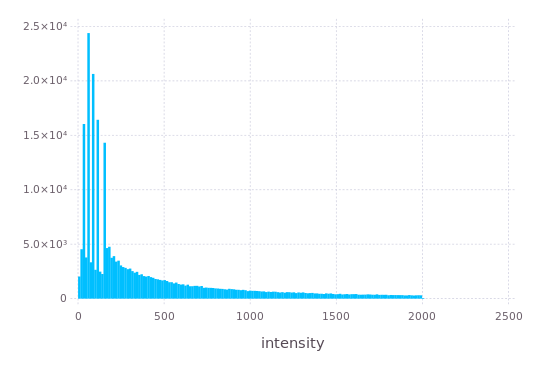

In [14]:
@time begin
Gadfly.plot(@where(b1_intensities, :intensity .< 2000), x = :intensity, Geom.histogram)
end